<a href="https://colab.research.google.com/github/66aadesh/AirBnB-Bookings-EDA/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Introduction

Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast.com. (Source- https://en.wikipedia.org/wiki/Airbnb)



# BASIC CODE FOR STARTING OUR EXPLORATORY DATA ANALYSIS.

In [1]:
# Let us start with the basic codes to import the libraries we need.
import numpy as np
import pandas as pd

In [2]:
# Now as the next step to import the data, we will mount the drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Now we read the data that has been provided for purpose of EDA - AirBnB hotel bookings data.
airbnb_df = pd.read_csv('/content/drive/MyDrive/EDA/Airbnb NYC 2019 (2).csv')

As part of EDA let us run some basic codes to learn the data at face value.

# CHECKING THE GIVEN DATA AT FACE VALUE: -

We will run basic commands to check the quality and quantity of data that we have at hand.

In [11]:
airbnb_df.shape

(48895, 16)

In [12]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
airbnb_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [7]:
airbnb_df.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [13]:
# Let us get the list of column labels so that it is easy for us to see which column data might be really important for a particular given problem.
list_of_column_labels=list(airbnb_df.columns)
print(list_of_column_labels)

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [8]:
# We will use describe() to get the measures of central tendencies, so that if trivial info is required from any column, one can easily get it.
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Q-1 What can we learn about different hosts and areas?

From a business perspective, there are probably thousands of things one might need from the asked question. However, we can find face value data and derive conclusion which might be helpful for a business looking to expand.

- One could be looking for number of listings in a district or a sub-district.
- One could be looking for the number of listings owned by the hosts based on different demographic points such as first name, caste, religion, sex, age, etc.


These above mentioned were two types of comparisons that come to the mind without a second thought about the data.
Hence we shall first look at the data and then derive the comparisons we want.

In [16]:
# From the basic codes, we know that not all columns are required for Q-1 so we will pick the ones which are necessary and prepare graphical representations.

hosts_and_areas=airbnb_df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood']]
hosts_and_areas.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown


# GRAPH - 1.1

In [19]:
# Although we do get meaningful data from the above subset of main dataframe, we shall divide it according to the neighbourhood and neighbourhood_group.
hosts_and_areas_neighbourhood_group=airbnb_df[['id','name','host_id','host_name','neighbourhood_group']]
hosts_and_areas_neighbourhood_group.head(10)

,id,name,host_id,host_name,neighbourhood_group
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan


In [27]:
# Let us find the density of listings on base of neighbourhood_group.
hosts_and_areas_neighbourhood_group_bar=hosts_and_areas_neighbourhood_group.groupby('neighbourhood_group')['id'].count()
hosts_and_areas_neighbourhood_group_bar

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: id, dtype: int64

Text(0, 0.5, 'Number of listings')

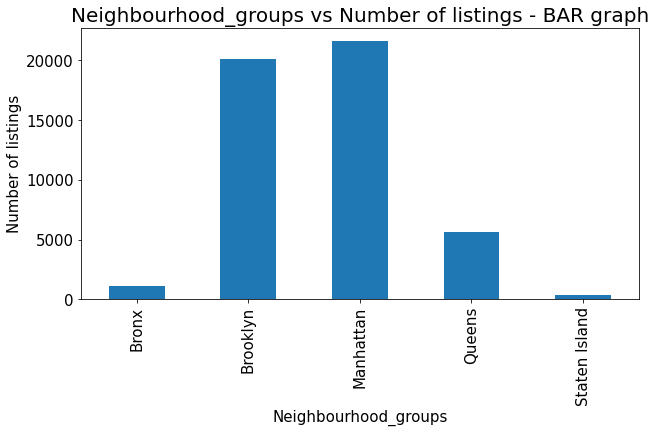

In [28]:
# Let us finally write the codes to print the graphical representation of the above data.
bar_1=hosts_and_areas_neighbourhood_group_bar.plot.bar(figsize=(10,5),fontsize=15)
bar_1.set_title("Neighbourhood_groups vs Number of listings - BAR graph", fontsize=20)
bar_1.set_xlabel("Neighbourhood_groups", fontsize=15)
bar_1.set_ylabel("Number of listings", fontsize=15)

# GRAPH - 1.2

In [29]:
hosts_and_areas_neighbourhood=airbnb_df[['id','name','host_id','host_name','neighbourhood']]
hosts_and_areas_neighbourhood.head(10)

,id,name,host_id,host_name,neighbourhood
0,2539,Clean & quiet apt home by the park,2787,John,Kensington
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill
6,5121,BlissArtsSpace!,7356,Garon,Bedford-Stuyvesant
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Hell's Kitchen
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Upper West Side
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Chinatown


In [33]:
hosts_and_areas_neighbourhood_bar=hosts_and_areas_neighbourhood.groupby('neighbourhood')['id'].count()
hosts_and_areas_neighbourhood_bar

neighbourhood
Allerton            42
Arden Heights        4
Arrochar            21
Arverne             77
Astoria            900
                  ... 
Windsor Terrace    157
Woodhaven           88
Woodlawn            11
Woodrow              1
Woodside           235
Name: id, Length: 221, dtype: int64

Text(0, 0.5, 'Number of listings')

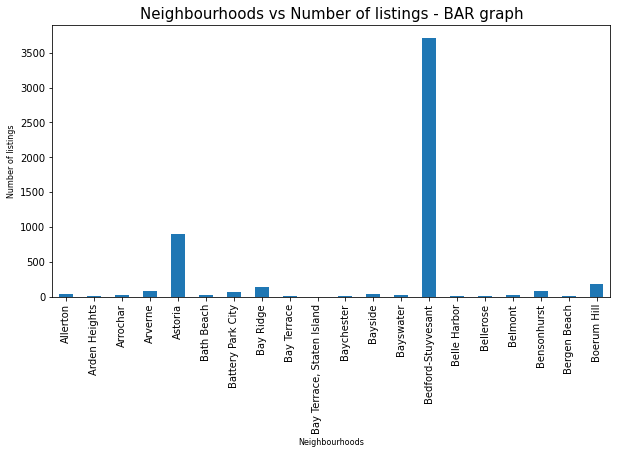

In [38]:
bar_2=hosts_and_areas_neighbourhood_bar.head(20).plot.bar(figsize=(10,5),fontsize=10)
bar_2.set_title("Neighbourhoods vs Number of listings - BAR graph", fontsize=15)
bar_2.set_xlabel("Neighbourhoods", fontsize=8)
bar_2.set_ylabel("Number of listings", fontsize=8)

# Q-2 What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
location_prices_reviews=airbnb_df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','price','minimum_nights','number_of_reviews','last_review','reviews_per_month']]
location_prices_reviews.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,149,1,9,2018-10-19,0.21
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,225,1,45,2019-05-21,0.38
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,150,3,0,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,89,1,270,2019-07-05,4.64
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,80,10,9,2018-11-19,0.10
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,200,3,74,2019-06-22,0.59
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,60,45,49,2017-10-05,0.40
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,79,2,430,2019-06-24,3.47
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,79,2,118,2017-07-21,0.99
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,150,1,160,2019-06-09,1.33


In [ ]:
#print("The average price for AirBnB listings in city of New York = ",location_prices_reviews['price'].mean())
location_prices_reviews['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
location_prices_reviews[['number_of_reviews','reviews_per_month']].describe()

,number_of_reviews,reviews_per_month
count,48895.000000,38843.000000
mean,23.274466,1.373221
std,44.550582,1.680442
min,0.000000,0.010000
25%,1.000000,0.190000
50%,5.000000,0.720000
75%,24.000000,2.020000
max,629.000000,58.500000
